# PMR3409 - Controle II
# Experiência 1: Introdução ao controle digital, transformada de Fourier discreta

# Identificação

**Aluno 1 :** Alessandro B Silva **NUSP:** 10334040 **Turma:** 5

**Aluno 2 :** Vitor Luiz Lima Carazzi **NUSP:** 9834010 **Turma:** 2

**Turma de Laboratório:** 5 e 2

**Professor:** Newton


**OBS: Você deve submeter o seu relatório em um arquivo compactado contendo os seguintes arquivos:**

- Arquivo *.ipynb.
- Diretório contendo todas as figuras do seu relatório.
- Arquivo *.html equivalente ao seu arquivo *.ipynb. Menu: File -> Download as -> HTML

## 1- Introdução

Nessa Experiência apresenta-se inicialmente os componentes básicos de um sistema de controle digital. Posteriormente,  explora-se a Transformada de Fourier e especialmente a sua versão de tempo discreto: o algoritmo FFT que é fundamental para a análise dos sinais em tempo discreto.


<img src="attachment:/Figuras/discreto.png" width="400">

## 2. Sistema de controle Digital

O desenvolvimento da teoria de sistemas de tempo discreto está intimamente ligado à área de Análise Numérica especialmente através da aproximação de sistemas dinâmicos de tempo contínuo utilizando equações de diferenças que permitem a simulação ou integração numérica aproximada desses sistemas.

A aplicação prática de sistemas de tempo discreto passa a ter importância a partir dos anos 40/50 com sua utilização inicialmente na área de comunicações e depois na área de controle o que impulsionou o desenvolvimento teórico da Transformada Z.

A aplicação em larga escala de sistemas de controle digital só se tornou realidade a partir dos anos 70 com o desenvolvimento dos microprocessadores e microcontroladores. 

Um sistema de controle digital pode ser genericamente representado através do seguinte diagrama esquemático:
 
<img src="./Figuras/discreto.jpg" width="70%" height="70%"/>
 
Observamos no sistema de controle digital três elementos básicos:

- **conversor Analógico-Digital (A/D):** realiza a operação de amostragem (Sampler) do sensor analógico que monitora
   a saída do sistema $y(t)$ transformando o valor de tensão analógica em um número inteiro
  (O valor inteiro resultante depende do intervalo de quantização e do número de bits que define a resolução do conversor A/D).  A operação de conversão implica em uma operação de truncamento. O método de truncamento é dependente do sistema computacional (Hardware e software).
  Usualmente converte-se o número inteiro em
  um número do tipo float compatível com o intervalo de quantização armazenando esse valor na variável $y(k)$. Todas as  operações internas no computador são usualmente realizadas em ponto flutuante$^1$.
- **computador:** calcula o algoritmo de controle. Podemos representar o algoritmo de controle genericamente através de uma representação em espaço de estados de tempo discreto:
              
$$
\begin{align}
x_c(k+1) & = A_c x_c(k)+ B_c e(k)\\
u(k) &= C_c x_c(k)
\end{align}
$$
              
- **conversor Digital-Analógico (D/A):** realiza a operação de conversão do esforço de controle calculado $u(k)$ em um valor analógico $u(t)$. Nessa operação utiliza-se um bloco denominado
   Segurador de Ordem Zero (Hold) que mantem o valor de $u(t)$ constante até a próxima operação de conversão. Também aqui o valor final da tensão analógica depende do número de bits e do intervalo de operação. Ou seja, os valores $u(k)$ e $u(t)$ podem ser diferentes devido a resolução.
   
Dessa forma, concluímos que um sistema de controle digital tem comportamento híbrido havendo uma parte em tempo discreto e uma parte em tempo contínuo.

**Um outro aspecto bastante importante é que o sistema de controle digital funciona sincronizadamente realizando operações a cada intervalo de tempo $T$ denominado intervalo de amostragem. A escolha do valor de $T$ será um dos temas principais desse curso**

**$^1$: No início os microprocessadores não realizavam operações em ponto flutuante. Operações de ponto flutuante eram sintetizadas por software.**


**Para responder o questionário abaixo você deve realizar a leitura da Apostila 1, Parte I**

a-) Para as especificações de conversores Analógico-Digitais (A/D) abaixo calcule a resolução da tensão em Volts equivalente a 1 bit:

|Intervalo de quantização [Volts]|N bits|Ganho|resolução|
|:-|:-|:-|:-|
|[0,+10]|8|1|0,039006|
|[-5,+5]|12|10|0.000122|
|[0,+10]|16|1|0,000152|

b-) Como citado acima, o sistema de controle digital funciona de maneira sincronizada com o intervalo de amostragem $T$. Se ocorrer um distúrbio no sistema provocando uma mudança de $y(t)$ entre duas amostragens delimitadas pelos instantes $t_k=kT$ e $t_{k+1}=(k+1)T$ qual será a reação do controlador ?

**Resposta:**

Nenhuma. Pois o distúrbio não será amostrado pelo  sensor, uma vez que o sinal so é amostrado em t=kT e t=(k+1)T.

C-) O senso comum nos diz que se diminuirmos o intervalo de amostragem $T$ a equação de diferenças correspondente ao controlador fica mais próxima do sistema de tempo contínuo (Obs: isso seria equivalente a diminuir o passo de integração $h$ na integração numérica) mas isso tem como consequencia uma sobrecarga no sistema computacional.
Apresente uma argumentação qualitativa para uma escolha razoável da grandeza $T$.

**Resposta:**

Pelo teorema de Nyquist, uma frequência 2 vezes maior que a máxima frequência amostrada é suficiente para amostrar um sinal sem causar aliasing. Assim aumentar a taxa de amostragem além da frequência não é necessário, porque isso pode sair muito cara depedendo da ordem da grandeza estudada.



In [12]:
# Script FFT para Onda Quadrada
%matplotlib qt
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal
SampRate =  100                      # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao =   2                      # Duracao da amostragem
N = int(Duracao/T)                # Numero de pontos amostrados
t = np.linspace(0.0,Duracao-T,N)  # array de tempo
# Parametros da onda senoidal
A =      2                # Amplitude
fsignal =    5            # Frequencia do sinal senoidal Hz
Phi =       0             # Angulo de fase em radianos
K =    0                  # Constante
# amostragem de uma onda quadrada
#
x = K+A*signal.square(2*np.pi*fsignal*t + Phi)
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.05               # parametro de tolerancia
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x,use_line_collection=True)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2],use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()

## 3. Análise de sinais através da Transformada de Fourier

**Para responder o questionário abaixo você deve realizar a leitura da Apostila 1, Parte II**

## 3.2 Estimação dos espectros de frequência dos sinais amostrados através do algoritmo FFT

Nessa seção será utilizado o algoritmo denominado Transformada Rápida de Fourier mais conhecido como
algoritmo FFT (Fast Fourier Transform).
O algoritmo FFT é um algoritmo de transformada de Fourier discreta (DFT) que calcula os espectros de
frequência através de amostras do domínio do tempo discreto.

Usualmente utilizaríamos aqui um setup experimental com gerador de funções e um computador equipado com uma placa de aquisição de sinais. Na impossibilidade da utilização desses equipamentos faremos uma simulação da amostragem dos sinais a serem analisados.

**Maiores informações sobre o algoritmo FFT pode ser encontrado no arquivo TutorialFFT.html (Os scripts desse tutorial foram escritos em Matlab).**

## 3.1 Cálculo analítico dos espectros de frequência dos sinais

Calcule as expressões analíticas dos espectros de frequência teóricos para as funções periódicas definidas abaixo utilizando a expansão através de funções senos e cosenos e também através de funções exponenciais complexas.
**OBS: Necessário mostrar os cálculos analíticos.**

**a-) Onda senoidal:**
      $$
      x(t) = A\sin(\omega_0 t)
      $$

onde $\omega_0=2\pi \frac{1}{T}$.      
      
<img src="./Figuras/funcaoseno.png" width="25%" height="25%"/>

      
**Resposta:**

$a_0=a_n=0$, pois função é impar.  
$b_n=0, n>1$  
$b_n=A, n=1$  

$C_n=0, n≠1$   
$C_n=\frac{-A}{2}j, n=1$

   
**b-) Onda quadrada:**
      $$
      x(t) = \begin{cases} \;\;A  & 0           \leq t < \frac{T}{2} \\
                              -A  & \frac{T}{2} \leq t < T \end{cases}
      $$
      
<img src="./Figuras/funcaoquadrada.png" width="25%" height="25%"/>      

**Resposta:**
$a_0=a_n=0$, pois função é impar.  
$f(x) = b_n = \frac{2A}{\pi n} (1-cos(n\pi))$
 
$C_n=\frac{A}{2}, n=0$  
$C_n=A\frac{ (e^{-jn\pi}-1 )}{n\pi}j, n≠0$

 


     
**c-) Onda triangular:**
      $$
      x(t) = \begin{cases} \;\;\frac{4A}{T}t                & 0            \leq t < \frac{1}{4}T \\
                           -\frac{4A}{T}(t-\frac{1}{2}T)    & \frac{T}{4}  \leq t < \frac{3}{4}T \\
                           \;\;\frac{4A}{T}(t-T)            & \frac{3}{4}T \leq t < T \end{cases}
      $$
	
<img src="./Figuras/funcaotriangular.png" width="25%" height="25%"/>

**Resposta:**

$a_0=a_n=0$, pois função é impar.  
$f(x) = b_n = A(\frac{8 sen(n\pi /2)}{n^2\pi^2} - \frac{4 sen(n\pi)}{n^2\pi^2})$

 
 Utilizando a representação trigonométrica da função triângulo para calcular a integral:
 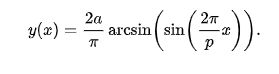
 
 
 $C_n=\frac{4A}{n^2\pi^2}j$




### 3.2.1 Onda senoidal

### a-) Calcule o espectro de uma onda senoidal utilizando o algoritmo FFT com os seguintes parametros:
    
- Taxa de amostragem: 100 amostras/s.
    
- $x(t) = 2.0 \sin(2\pi 5t)$..

Utilize o script abaixo.

<img src="./Figuras/a.png"/>

### b-) Compare com o resultado analítico da seção 3.2

**Resposta:**

Como esperado $C_n$ é zero em todo o domínio com exceção de um ponto (aproximadamente 5Hz). O valor também é compatível com o calculado.  
$C_n=\frac{-A}{2}j, n=1$

### c-) Calcule o spectro de uma onda senoidal utilizando o algoritmo FFT com os seguintes parâmetros:

- Taxa de amostragem: 100 amostras/s.   
- $x(t) = 2.0 \sin(2\pi 5t+\pi/2)$.

Utilize o script abaixo.

<img src="./Figuras/c.png"/>

### d-) Calcule a expressão analítica correspondente ao ítem c-) e compare os resultados.

**Resposta:**
Resolvendo a integral $\int_\frac{-T}{2}^\frac{T}{2} 2 sen(10\pi t + \frac{\pi}{2})e^{-jn w_0 t}$
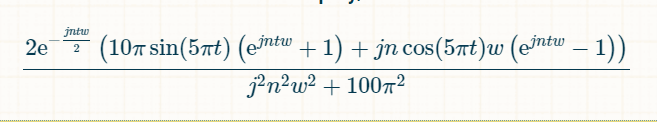

O valor encontrado para n=0 é $C_n=\frac{sen(5\pi t)}{2,5\pi}$, sendo uma parcela não complexa. Dessa forma a maior parte do domínio apresenta ângulo de fase=0. 

A qualidade de estimação do algoritmo FFT depende de vários parâmetros como o número de pontos amostrados e a taxa de amostragem. Obviamente essas duas grandezas estão diretamente relacionadas.
As questões a seguir exploram essa relação de maneira qualitativa. A utilização de uma taxa de amostragem adequada será apresentada com detalhes na Experiência 2. 


### e-)  Calculo de espectros da onda senoidal  com variação do número de pontos amostrados:

Calcule espectros com os seguintes parâmetros:
- Taxa de amostragem: 50 amostras/s.
- Duração: {10.0,2.0,0.5} segundos.
- $x(t) = 2.0 \sin(2\pi 5t+\pi/2)$.

Analise os resultados de maneira qualitativa.

**Resposta:**
<img src="./Figuras/e1.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com duaração de 10s. 
<img src="./Figuras/e2.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com duaração de 2s. 
<img src="./Figuras/e3.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com duaração de 0.5s.  

A análise com duração de 0.5 s é a mais interessante, pois captura com mais detalhes o movimento analisado. Já que o período da função é 0.2 s. Dessa maneira as variações de $C_n$ podem ser melhor visualizadas, já que o gráfico não fica poluido com respostas repetidas.


### f-)  Calculo de espectros da onda senoidal  com variação da taxa de amostragem:

Calcule espectros com os seguintes parâmetros:
- Taxa de amostragem: {50,25,15} amostras/s.
- Duração: 2 segundos.
- $x(t) = 2.0 \sin(2\pi 5t+\pi/2)$.

Analise os resultados de maneira qualitativa.

**Resposta:**
 
 <img src="./Figuras/f1.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com taxa de amostragem de 50 samples/s. 
<img src="./Figuras/f2.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com taxa de amostragem de 25 samples/s.
<img src="./Figuras/f3.png"/>
$x(t) = 2.0 \sin(2\pi 5t+\pi/2)$ com taxa de amostragem de 15 samples/s.  
 


A redução na amostragem causa perde de informação nos gráficos. As variações se assemelham a impulsos, uma vez que somente os topos e vales das variações são capturados, porque o período de amostragem fica muito longo.
 

In [4]:
# Script FFT para Onda Senoidal
%matplotlib qt
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal
SampRate =15                    # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao =2                     # Duracao da amostragem
N = int(Duracao/T)                # Numero de pontos amostrados
t = np.linspace(0.0,Duracao-T,N)  # array de tempo
# Parametros da onda senoidal
A =2                    # Amplitude
fsignal = 5              # Frequencia do sinal senoidal Hz
Phi = np.pi/2                   # Angulo de fase em radianos
K = 0                     # Constante
# Simulacao da amostragem da onda senoidal
x = K + A * np.sin(2*np.pi*fsignal*t + Phi)
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.01               # parametro de tolerancia
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x,use_line_collection=True)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2],use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()



## 3.2.3 Onda Quadrada

### a-) Calcule o espectro de uma onda quadrada utilizando o algoritmo FFT com os seguintes parametros:
    
- Taxa de amostragem: 100 amostras/s.
    
- $x(t) = 2.0 f(2\pi 5t)$, onde $f(t)$ representa a função da onda quadrada.

Utilize o script abaixo.

 <img src="./Figuras/quadrada.png"/>


### b-) Compare com o resultado analítico da seção 3.2

**Resposta:**

$C_n=\frac{A}{2}, n=0$  
$C_n=A\frac{ (e^{-jn\pi}-1 )}{n\pi}j, n≠0$

Como calculado, na maior parte do domínio (n≠0) um valor pequeno é apresentado. Com picos proporcionais a $\frac{A}{2}$.

## 3.2.3 Onda Triangular

### a-) Calcule o espectro de uma onda triangular utilizando o algoritmo FFT com os seguintes parametros:
    
- Taxa de amostragem: 100 amostras/s.
    
- $x(t) = 2.0 f(2\pi 5t)$, onde $f(t)$ representa a função da onda triangular.

Utilize o script abaixo.

 <img src="./Figuras/triangulo.png"/>

### b-) Compare com o resultado analítico da seção 3.2

**Resposta:**

$C_n=\frac{4A}{n^2\pi^2}j$

O valor de $C_n$ calculado é amostrado no gráfico.


In [14]:
# Script FFT para Onda Triangular
%matplotlib qt
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal
SampRate =  100                      # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao =     2                    # Duracao da amostragem
N = int(Duracao/T)                # Numero de pontos amostrados
t = np.linspace(0.0,Duracao-T,N)  # array de tempo
# Parametros da onda senoidal
A =     2                 # Amplitude
fsignal =   5             # Frequencia do sinal senoidal Hz
Phi =       0             # Angulo de fase em radianos
K =    0                  # Constante
# amostragem de uma onda triangular
# sawtooth = dente de serra
# parametro 0.5 e' necessario para a onda triangular
x = A*signal.sawtooth(2*np.pi*fsignal*t + Phi,0.5)
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.01               # parametro de tolerancia
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x,use_line_collection=True)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2],use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show() 

## 4. Discussões

## 5. Conclusões